<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1KbWiGlupiSwYlqc8nmV6KjB3vNTI0C5hxZ6Tq3ZU4QA).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра 1 -yes (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: 1норма, 2выше нормы, 3значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [126]:
import numpy as np
import pandas as pd

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [127]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [128]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- <font color=green>45530 женщин и 24470 мужчин</font>
- 45530 мужчин и 24470 женщин

gender
1    161.355612
2    169.947895
Name: height, dtype: float64
gender
1    72.565605
2    77.257307
Name: weight, dtype: float64


1    45530
2    24470
Name: gender, dtype: int64

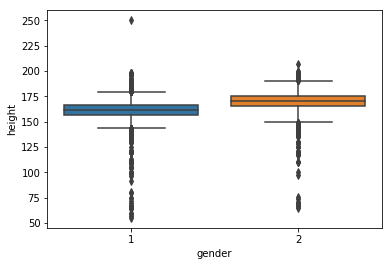

In [129]:
# Ваш код здесь

import seaborn as sns
sns.boxplot(df['gender'], df['height'])

#1 wooman
#2 Man
print(df.groupby(df['gender'])['height'].mean())
print(df.groupby(df['gender'])['weight'].mean())

df['gender'].value_counts()



,age,gender,my_gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,
0,18393,2,male,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,female,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,female,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,male,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,female,156,56.0,100,60,1,1,0,0,0,0


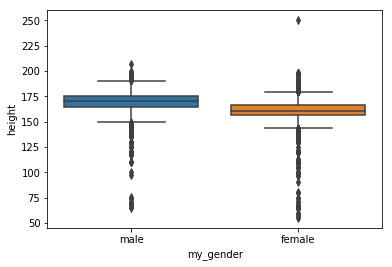

In [130]:
gender_dic = {1:'female', 2:'male'}
my_gender = (df['gender'].map(gender_dic)).astype('object')
df.insert(loc=2, column='my_gender', value=my_gender) 


sns.boxplot(df['my_gender'], df['height'])
df.head()

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**


кто меньше указывает алкоголь в анкете

**<font color='red'>Варианты:</font>**
- мужчины 
- <font color=green>женщины</font>

In [131]:
# Ваш код здесь
for group, sub in df.groupby(df['my_gender'])['alco']:
    print( group, sub.mean())

pd.crosstab(df['my_gender'], df['alco'])
#print(pd.crosstab(df['my_gender'], df['alco']).agg(np.mean, axis=0))

#print('male + alco',df[df['my_gender'] == 'male']['alco'].mean())
#print('female + alco',df[df['my_gender'] == 'female']['alco'].mean())


#print(len(df[(df['my_gender'] == 'male') & (df['alco']==1)]))
#print(len(df[(df['my_gender'] == 'male') & (df['alco']==0)]))

#print('**'*10)

#print(len(df[(df['my_gender'] == 'female') & (df['alco']==1)]))
#print(len(df[(df['my_gender'] == 'female') & (df['alco']==0)]))




female 0.02549967054689216
male 0.10637515324887617


alco,0,1
my_gender,,
female,44369,1161
male,21867,2603


**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
    - <font color='green'>12</font>
- 16

In [132]:
# Ваш код здесь


#процент курящих среди мужчин

pd.crosstab(df['my_gender'], df['smoke'])

total_male = len(df[df['my_gender']=='male'])
smoking_male = len(df[(df['my_gender']=='male') & (df['smoke']==1)])
print("total male i, smoking %f",total_male, smoking_male)
male_smoking_percent = smoking_male/(total_male/100)
print(male_smoking_percent)


#процент курящих среди женщин
total_female = len(df[df['my_gender']=='female'])
smoking_female = len(df[(df['my_gender']=='female') & (df['smoke']==1)])
print("total male i, smoking %f",total_female, smoking_female)
female_percent_smoking = smoking_female/(total_female/100)
print(female_percent_smoking)

print(round(male_smoking_percent/female_percent_smoking))

#--------------------------------------------
df.groupby(df['my_gender'])['smoke'].sum()

total male i, smoking %f 24470 5356
21.88802615447487
total male i, smoking %f 45530 813
1.785635844498133
12


my_gender
female     813
male      5356
Name: smoke, dtype: int64

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, 

на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- <font color='red'>20</font>
- 25

smoke
0    19722
1    19125
Name: age, dtype: int64
-20


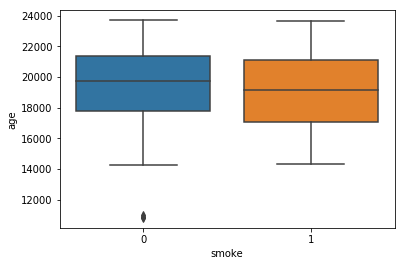

In [211]:
# Ваш код здесь

print(df.groupby(df['smoke'])['age'].median())
sns.boxplot(df['smoke'], df['age'])

#df.groupby(['smoke'])['age'].describe(percentiles=[np.median])
df.groupby(['smoke'])['age'].agg([np.median])

print (round((df[df['smoke']==1]['age']/365.25*12).median() - (df[df['smoke']==0]['age']/365.25*12).median()))



**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- <font color='red'>2</font>
- 3
- 4
- 5

In [134]:
# Ваш код здесь

age_years = (round(df['age']/365.25)).astype('int64')
df.insert(loc=1, column='age_years', value=age_years) 
df.head()

,age,age_years,gender,my_gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,,
0,18393,50,2,male,168,62.0,110,80,1,1,0,0,1,0
1,20228,55,1,female,156,85.0,140,90,3,1,0,0,1,1
2,18857,52,1,female,165,64.0,130,70,3,1,0,0,0,1
3,17623,48,2,male,169,82.0,150,100,1,1,0,0,1,1
4,17474,48,1,female,156,56.0,100,60,1,1,0,0,0,0


In [212]:
men_60_64 = df[(df['my_gender']=='male') & (df['age_years']>=60) & (df['age_years']<=64)]
I_group = men_60_64[(men_60_64['ap_hi'] < 120) & (men_60_64['cholesterol'] == 1)]
II_group = men_60_64[(men_60_64['ap_hi'] >= 160) & (men_60_64['ap_hi'] < 180) & (men_60_64['cholesterol'] == 3)]

I_perc = len(I_group['cardio'])/100
print(len(I_group[I_group['cardio'] == 1])/I_perc)

II_perc = len(II_group['cardio'])/100
print(len(II_group[II_group['cardio'] == 1])/II_perc)


print(I_group['cardio'].mean())
print(II_group['cardio'].mean())





round(100 * II_group['cardio'].mean())/round(100 * I_group['cardio'].mean())


40.0
85.85858585858585
0.4
0.8585858585858586


2.15

In [157]:
round((round(II_group['cardio'].mean()/I_group['cardio'].mean())))

2.0

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- <font color='red'>Медианный BMI по выборке превышает норму</font>
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- <font color='red'>В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин</font>

In [161]:
# Ваш код здесь

df['BMI'] = df['weight']/(df['height']/100)**2
df['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [173]:
df.groupby('my_gender')['BMI'].describe()


,BMI,cardio
,mean,mean
my_gender,,
female,27.987583,0.496727
male,26.754442,0.505231


In [174]:
df.groupby(['cardio'])['BMI'].agg([np.mean])

,mean
cardio,
0,26.548175
1,28.566061


In [175]:
healthy_men = df[(df['cardio']==0) & (df['my_gender']=='male')]
healthy_men['BMI'].describe()

count    12107.000000
mean        25.897847
std          4.976057
min          7.022248
25%         23.306680
50%         25.142857
75%         27.763430
max        170.414201
Name: BMI, dtype: float64

In [176]:
healthy_woomen = df[(df['cardio']==0) & (df['my_gender']=='female')]
healthy_woomen['BMI'].describe()

count    22914.000000
mean        26.891787
std          5.883630
min          9.331007
25%         23.437500
50%         25.711662
75%         29.402273
max        237.768633
Name: BMI, dtype: float64

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Это вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- <font color='red'>10</font>
- 11

In [201]:
# Ваш код здесь

filtered_df = df[(df['ap_lo'] > df['ap_hi']) 
                 | (df['height'] < df['height'].quantile(.025)) 
                 | (df['height'] > df['height'].quantile(.975))
                 | (df['weight'] < df['weight'].quantile(.025)) 
                 | (df['weight'] > df['weight'].quantile(.975))]
print(round(len(filtered_df)/700))
print(len(df)/100)

#data['is_rich'] = (data['wage'] > 
#                   data['wage'].quantile(.75)).astype('int64')

10
700.0


ValueError: cannot evaluate a numeric op with unequal lengths